In [40]:
import numpy as numpy
import matplotlib.pyplot as plt
import math
from scipy.misc import derivative

%matplotlib inline

In [41]:
u = 2.0
a = 1.0
x_0 = 0.0001 #Решение всегда в этих пределах
x_1 = 0.9999

In [42]:
def asymptote():
    return max(1.0 - math.pow(math.pi, 2) * 1.0 / (2 * math.pow(a, 2) * u), x_0)

In [43]:
def Newton_method(begin, function, epsilon):
     history = list()
     while(math.fabs(function(begin)) > epsilon):
         history.append(begin)
         begin = begin - function(begin) / derivative(function, begin, dx = epsilon / 10)
     return history

def Simple_iteration_method(begin, function, epsilon):
    history_x = list()
    history_y = list()
    x = begin
    y = x
    while True:
        if x > 1:
            break 
        y = function(x) * -0.05 + x
        if math.isnan(y) | (math.fabs(y - x) < epsilon):
            break
        history_x.append(x)
        history_y.append(y)
        x = y
    return history_x, history_y

def Dihotomy_method(x0, x1, function, epsilon):
    history = list()
    left = x0
    right = x1
    middle =(x0 + x1) * 0.5
    while (math.fabs(right-left) > epsilon) & \
        ( numpy.sign(function(left)) != numpy.sign(function(right)) ):
        middle =(left + right) * 0.5
        history.append(middle)
        if numpy.sign(function(left)) == numpy.sign(function(middle)):
            left = middle
        if numpy.sign(function(right)) == numpy.sign(function(middle)):
            right = middle
    return history

def function(x):
    return 1 / math.tan(math.sqrt(2 * math.pow(a, 2) * u * (1 - x))) - math.sqrt(1 / x - 1.0)
epsilon = 0.000001
res_nm = Newton_method((asymptote()+ 1.0) * 0.5, function, epsilon)
_, res_sim = Simple_iteration_method((asymptote() + 1.0) * 0.5, function, epsilon)
res_dm = Dihotomy_method(x_0, x_1, function, epsilon)

Newton   - 0.7349613650704202;Number of steps - 3
Simple   - 0.734839748847766;Number of steps - 48
Dihotomy - 0.7348439596176147;Number of steps - 20


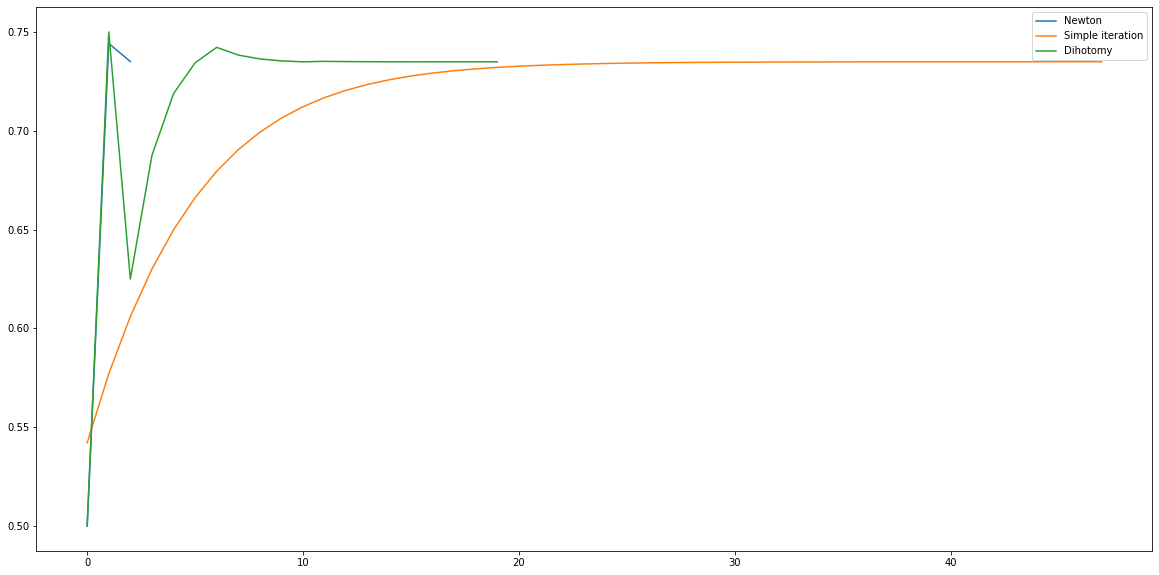

In [48]:
plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots()
ax.plot(res_nm, label='Newton')
ax.plot(res_sim, label='Simple iteration')
ax.plot(res_dm, label= 'Dihotomy')
ax.legend()
print('Newton   - ' + str(res_nm.copy().pop()) + ';Number of steps - ' + str(len(res_nm)))
print('Simple   - ' + str(res_sim.copy().pop()) + ';Number of steps - ' + str(len(res_sim)))
print('Dihotomy - ' + str(res_dm.copy().pop()) + ';Number of steps - ' + str(len(res_dm)))